# Using deep learning algorithm- Multilayer Perceptron(MLP) for image classification

## What is deep learning?

Deep learning is inspired by the functionality of human brain cells called artificial neural network.
Deep learning is one of machine learning algorithm that takes data in form of images, videos, text and connections between all the neurons are adjusted according to the pattern of the data

Deep learning is a sub field within machine learning used for learning multiple levels of representation in order to model complex connection between the data
Higher-level features are defined with the help of lower levels and such hierarchy of features is called deep architecture. If we draw a graph showing how these concepts are built over each other the graph is deep with many layers. Hence, we call this learning approach as deep learning



# MLP -Multilayer Perceptron 

### Batch Normalization 
Batch normalisation is a technique for improving the performance and stability of neural networks

How does batch normalization help? We know that normalising the inputs to a network helps it learn. But a network is just a series of layers, where the output of one layer becomes the input to the next. That means we can think of any layer in a neural network as the first layer of a smaller subsequent network.
Thought of as a series of neural networks feeding into each other, we normalize the output of one layer before applying the activation function, and then feed it into the following layer (sub-network).

It’s called “batch” normalization because during training, we normalise the activations of the previous layer for each batch, i.e. apply a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

### MLP

An MLP is a network of simple neurons called perceptrons. The perceptron computes a single output from multiple real-valued inputs by forming a linear combination according to its input weights and then possibly putting the output through some nonlinear activation function.

A typical multilayer perceptron (MLP) network consists of a set of source nodes forming the input layer, one or more hidden layers of computation nodes, and an output layer of nodes. The input signal propagates through the network layer-by-layer. The signal-flow of such a network with one hidden layer is shown in the following figure

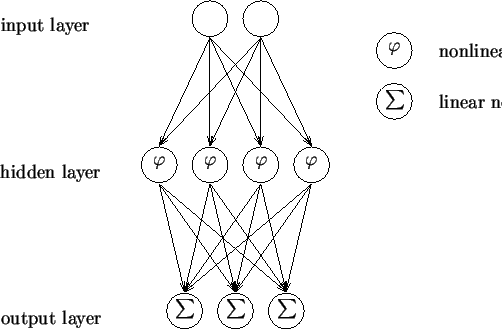

## Loading required packages

TensorFlow installation: https://www.tensorflow.org/install/

What is Tensorflow?
TensorFlow is an open source software library for numerical computation using dataflow graphs. 

In [2]:
import sys;
import tensorflow as tf; 
import keras; 
import warnings; 
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

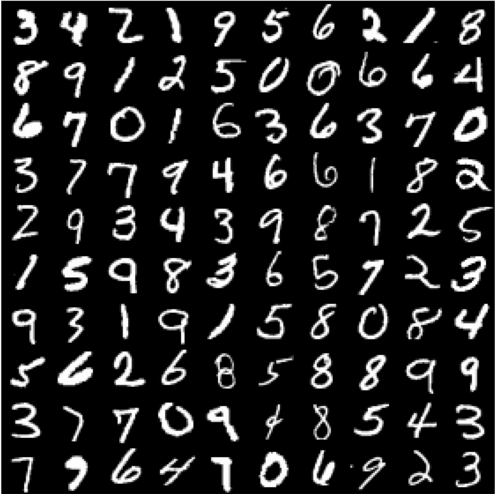

The MNIST Dataset can be downloaded from tensorflow mnist package

MNIST is a database of handwritten numbers.You can also refer to the <a href="http://yann.lecun.com/exdb/mnist/">link</a> to view and read about MNIST datatset. Since MNIST uses real-world data, it is an ideal database for training neural networks and machine learning tools that use pattern recognition.
Run the following cell to get the MNIST data set of images of handwritten numbers:

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST-DATA", one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-DATA/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-DATA/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-DATA/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-DATA/t10k-labels-idx1-ubyte.gz
Instructions f

In [4]:
mnist.train.images.shape

(55000, 784)

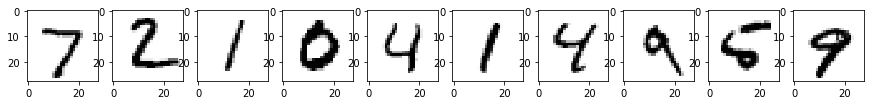

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [3]:
from keras.models import Model
from keras.layers import Input, Dense, Activation
from keras.layers import Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization

## Defining the MLP function  with batch normalization and activation function parameters

In [7]:
def mlp(batch_normalization=False, activation='sigmoid'):
    _in = Input(shape=(784,))
    
    for i in range(5):
        x = Dense(128, activation=activation, input_shape=(784,))(x if i else _in)
        if batch_normalization:
            x = BatchNormalization()(x)

    _out = Dense(10, activation='softmax')(x)
    model = Model(_in, _out)

    return model

In [8]:
from  functools import reduce
#function to print the layers
def print_layers(model):
    for l in model.layers:
        print(l.name, l.output_shape, [reduce(lambda x, y: x*y, w.shape) for w in l.get_weights()])

### Callback function

A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. 

In [9]:
from keras.callbacks import Callback

class BatchLogger(Callback):
#tracks the information on_train_begin
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []
#tracks the information on_batch_end
    def on_batch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])

## Sigmoid activation function

The sigmoid curve

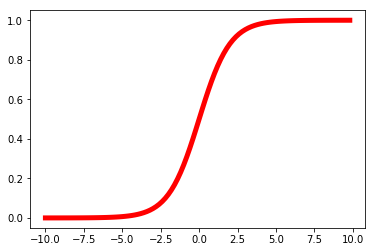

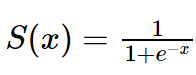

The sigmoid function gives an ‘S’ shaped curve.

This curve has a finite limit of:

‘0’ as x approaches −∞

‘1’ as x approaches +∞

The output of sigmoid function when x=0 is 0.5

Thus, if the output is more than 0.5 , we can classify the outcome as 1 (or YES) and if it is less than 0.5 , we can classify it as 0(or NO) .

For example: If the output is 0.65, we can say in terms of probability as:

“There is a 65 percent chance that your favorite foot ball team is going to win today ” .

Thus the output of the sigmoid function can not be just used to classify YES/NO, it can also be used to determine the probability of YES/NO.

In [10]:
## batch normalization parameter is given as false (without batch normalization)
#loss function used-categorical_crossentropy
#optimizer used - Adam -Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

model_sigmoid = mlp(False, 'sigmoid')
print_layers(model_sigmoid)

bl_noBN = BatchLogger()

from keras.optimizers import Adam
model_sigmoid.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"])

model_sigmoid.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, epochs=20, verbose=1, callbacks=[bl_noBN],
          validation_data=(mnist.test.images, mnist.test.labels))

('input_1', (None, 784), [])
('dense_1', (None, 128), [100352, 128])
('dense_2', (None, 128), [16384, 128])
('dense_3', (None, 128), [16384, 128])
('dense_4', (None, 128), [16384, 128])
('dense_5', (None, 128), [16384, 128])
('dense_6', (None, 10), [1280, 10])
Train on 55000 samples, validate on 10000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 64us/step - loss: 1.2647 - acc: 0.5556 - val_loss: 0.5633 - val_acc: 0.8503
Epoch 2/20
55000/55000 [==============================] - 2s 41us/step - loss: 0.3935 - acc: 0.8953 - val_loss: 0.3014 - val_acc: 0.9214
Epoch 3/20
55000/55000 [==============================] - 3s 49us/step - loss: 0.2540 - acc: 0.9326 - val_loss: 0.2265 - val_acc: 0.9401
Epoch 4/20
55000/55000 [==============================] - 2s 43us/step - loss: 0.1952 - acc: 0.9482 - val_loss: 0.1860 - val_acc: 0.9497
Epoch 5/20
55000/55000 [==============================] - 2s 42us/step - loss: 0.1581 - acc: 0.9567 - val_loss: 0.1701 - val_acc: 0.9555
Epoc

In [12]:
evaluation = model_sigmoid.evaluate(mnist.test.images, mnist.test.labels, batch_size=256, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 21us/step
Summary: Loss over the test dataset: 0.14, Accuracy: 0.9678


In [13]:
## batch normalization parameter is given as true (with batch normalization)
model_sigmoid = mlp(True, 'sigmoid')
print_layers(model_sigmoid)

bl_BN = BatchLogger()

from keras.optimizers import Adam
model_sigmoid.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"])

model_sigmoid.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, epochs=20, verbose=1, callbacks=[bl_BN],
          validation_data=(mnist.test.images, mnist.test.labels))

('input_2', (None, 784), [])
('dense_7', (None, 128), [100352, 128])
('batch_normalization_1', (None, 128), [128, 128, 128, 128])
('dense_8', (None, 128), [16384, 128])
('batch_normalization_2', (None, 128), [128, 128, 128, 128])
('dense_9', (None, 128), [16384, 128])
('batch_normalization_3', (None, 128), [128, 128, 128, 128])
('dense_10', (None, 128), [16384, 128])
('batch_normalization_4', (None, 128), [128, 128, 128, 128])
('dense_11', (None, 128), [16384, 128])
('batch_normalization_5', (None, 128), [128, 128, 128, 128])
('dense_12', (None, 10), [1280, 10])
Train on 55000 samples, validate on 10000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 87us/step - loss: 0.3039 - acc: 0.9096 - val_loss: 0.1762 - val_acc: 0.9477
Epoch 2/20
55000/55000 [==============================] - 4s 64us/step - loss: 0.1604 - acc: 0.9520 - val_loss: 0.1300 - val_acc: 0.9607
Epoch 3/20
55000/55000 [==============================] - 3s 61us/step - loss: 0.1128 - acc: 0.9658 - val_l

In [15]:
evaluation1 = model_sigmoid.evaluate(mnist.test.images, mnist.test.labels, batch_size=256, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' % (evaluation1[0], evaluation1[1]))

10000/10000 [==============================] - 0s 25us/step
Summary: Loss over the test dataset: 0.10, Accuracy: 0.9752


### plots without and with batch normalization for sigmoid activation function

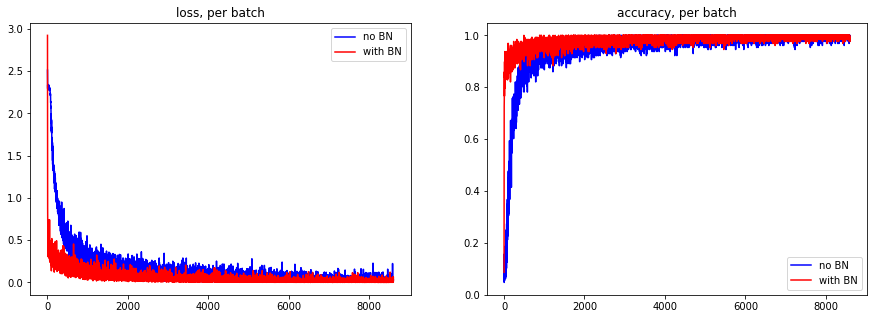

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_noBN.log_values['loss'], 'b-', label='no BN');
plt.plot(bl_BN.log_values['loss'], 'r-', label='with BN');
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_noBN.log_values['acc'], 'b-', label='no BN');
plt.plot(bl_BN.log_values['acc'], 'r-', label='with BN');
plt.legend(loc='lower right')
plt.show()

## ReLU activation function


A(x) = max(0,x)

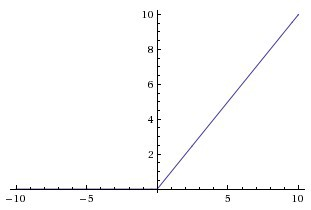

The ReLu function is as shown above. It gives an output x if x is positive and 0 otherwise.


In [17]:
## batch normalization parameter is given as false (without batch normalization)
model_relu = mlp(False, 'relu')
print_layers(model_relu)

bl_noBN = BatchLogger()

from keras.optimizers import Adam
model_relu.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"])

model_relu.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, epochs=20, verbose=1, callbacks=[bl_noBN],
          validation_data=(mnist.test.images, mnist.test.labels))

('input_3', (None, 784), [])
('dense_13', (None, 128), [100352, 128])
('dense_14', (None, 128), [16384, 128])
('dense_15', (None, 128), [16384, 128])
('dense_16', (None, 128), [16384, 128])
('dense_17', (None, 128), [16384, 128])
('dense_18', (None, 10), [1280, 10])
Train on 55000 samples, validate on 10000 samples
Epoch 1/20
55000/55000 [==============================] - 3s 49us/step - loss: 0.3251 - acc: 0.9013 - val_loss: 0.1603 - val_acc: 0.9499
Epoch 2/20
55000/55000 [==============================] - 2s 38us/step - loss: 0.1202 - acc: 0.9631 - val_loss: 0.1095 - val_acc: 0.9649
Epoch 3/20
55000/55000 [==============================] - 2s 38us/step - loss: 0.0842 - acc: 0.9738 - val_loss: 0.1021 - val_acc: 0.9707
Epoch 4/20
55000/55000 [==============================] - 2s 39us/step - loss: 0.0659 - acc: 0.9796 - val_loss: 0.0966 - val_acc: 0.9708
Epoch 5/20
55000/55000 [==============================] - 2s 37us/step - loss: 0.0505 - acc: 0.9838 - val_loss: 0.0923 - val_acc: 0.974

In [18]:
evaluation2 = model_relu.evaluate(mnist.test.images, mnist.test.labels, batch_size=256, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' % (evaluation2[0], evaluation2[1]))

10000/10000 [==============================] - 0s 10us/step
Summary: Loss over the test dataset: 0.11, Accuracy: 0.9760


In [19]:
## batch normalization parameter is given as true (with batch normalization)
model_relu = mlp(True, 'relu')
print_layers(model_relu)

bl_BN = BatchLogger()

from keras.optimizers import Adam
model_relu.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=["accuracy"])

model_relu.fit(mnist.train.images, mnist.train.labels,
          batch_size=128, epochs=1, verbose=1, callbacks=[bl_BN],
          validation_data=(mnist.test.images, mnist.test.labels))

('input_4', (None, 784), [])
('dense_19', (None, 128), [100352, 128])
('batch_normalization_6', (None, 128), [128, 128, 128, 128])
('dense_20', (None, 128), [16384, 128])
('batch_normalization_7', (None, 128), [128, 128, 128, 128])
('dense_21', (None, 128), [16384, 128])
('batch_normalization_8', (None, 128), [128, 128, 128, 128])
('dense_22', (None, 128), [16384, 128])
('batch_normalization_9', (None, 128), [128, 128, 128, 128])
('dense_23', (None, 128), [16384, 128])
('batch_normalization_10', (None, 128), [128, 128, 128, 128])
('dense_24', (None, 10), [1280, 10])
Train on 55000 samples, validate on 10000 samples
Epoch 1/1
55000/55000 [==============================] - 5s 95us/step - loss: 0.2903 - acc: 0.9092 - val_loss: 0.1549 - val_acc: 0.9503


In [20]:
evaluation3 = model_relu.evaluate(mnist.test.images, mnist.test.labels, batch_size=256, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' % (evaluation3[0], evaluation3[1]))

10000/10000 [==============================] - 0s 19us/step
Summary: Loss over the test dataset: 0.15, Accuracy: 0.9503


### plots without and with batch normalization for relu activation function

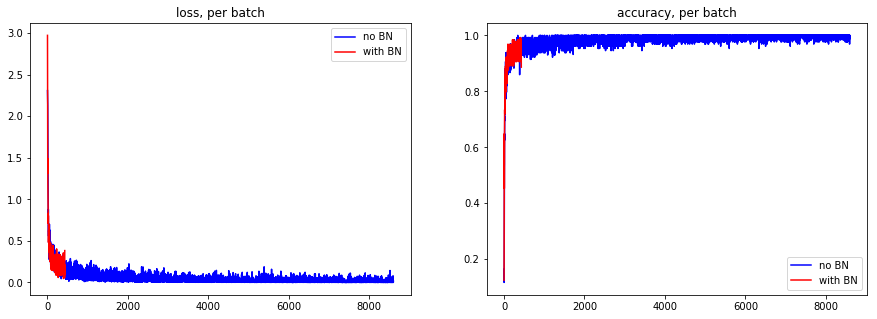

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_noBN.log_values['loss'], 'b-', label='no BN');
plt.plot(bl_BN.log_values['loss'], 'r-', label='with BN');
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_noBN.log_values['acc'], 'b-', label='no BN');
plt.plot(bl_BN.log_values['acc'], 'r-', label='with BN');
plt.legend(loc='lower right')
plt.show()

## The highest accuracy of 97.6% was achieved by the model using ReLU as the activation function 

# Licenses

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br>The text in the document by SHWETA TATIYA and RADHIKA GATHIA is licensed under <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br><br>


The code in the document by SHWETA TATIYA and RADHIKA GATHIA is licensed under the MIT License https://opensource.org/licenses/MIT

# References

In [5]:
# Dataset 
#http://yann.lecun.com/exdb/mnist/

# References

# https://github.com/nikbearbrown/NEU_COE
# MIT 6.S191: Introduction to Deep Learning https://youtu.be/JN6H4rQvwgY
#https://en.wikipedia.org/wiki/Multilayer_perceptron
#https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
#https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0